In [2]:
#!/usr/bin/env python
# coding: utf-8

# ## ----------------------------------PYTHON ASSIGNMENT - (1) --------------------------------------------

#                                          BY - TARUN KUMAR SHARMA
# 
# 
# 

#  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
pa = pd.read_csv("playstore-analysis (2) (1).csv")

In [4]:
pa.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
pa.shape

(10841, 13)

In [6]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:

pa.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [8]:
# #  (1) 
# # data clean up - missing value
#  # a. drop records where rating is missing since rating is our target variable
# 
pa.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
pa = pa.dropna(axis=0, subset=['Rating'])

In [13]:
pa.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [14]:
# # b. checking the null values 
#    # i. are all 3 records having the same problem?
pa.loc[pa['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# In Android Ver column all the three records having null values but according to data its looking like they don't have same problem.

# # ii. drop the 3rd record.

# In[13]:


pa.drop([10472],inplace=True)

In [16]:
pa.loc[pa['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [18]:
# # iii. replace null values with the mode




pa['Android Ver'].fillna(pa['Android Ver'].mode()[0],inplace=True)

In [19]:
pa.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
pa['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [21]:
new_price =[]
for x in pa['Price']:
    if x[0]=='$':
        new_price.append(x[1:])
    else:
        new_price.append(x)

In [22]:
pa['Price']=new_price

In [23]:
# #  (2)
# #  a. which all variables need to be brought to numeric types? 
# #  Reviews, Price and Installs column should be numberic
# #  b. price variable - remove $ sign and convert to float
pa['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [24]:
pa['Price']=pa['Price'].astype('float')

In [25]:
pa['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [26]:
# # c. installs-remove , and + sign,convert to integer
# # d. Convert all other identified columns to numeric
pa['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [27]:
install = []
for y in pa['Installs']:
    install.append(y.replace(',','').replace('+','').strip())

In [28]:
pa['Installs']=install

In [29]:
pa['Installs']=pa['Installs'].astype('int')
pa['Reviews']=pa['Reviews'].astype('int')

In [30]:
pa['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [31]:
# # (3)
# # sanity checks
# # a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
# #  i. Are there any such records? Drop if so.

# In[35]:
pa['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [32]:
pa.loc[(pa['Rating']<=1)&(pa['Rating']>=5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [33]:
#  

# There are no records less than & greather than 1 & 5 so,  all the records are in between 1 to 5 and  no need to drop anything.

# # b. Reviews should not be more than installs as only those who installed can review the app.
# # i. Are there any such records? Drop if so.
# 
pa.loc[pa['Reviews']>pa['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [34]:
# Yes.total 7 records in which review is more than installs.
remove = pa[pa['Reviews']>pa['Installs']].index
pa.drop(labels=remove, inplace=True)

In [35]:
pa.loc[pa['Reviews']>pa['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<module 'matplotlib.pyplot' from 'C:\\Users\\om\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

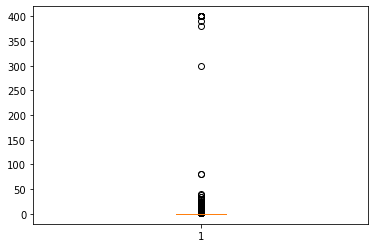

In [36]:
#  

# # (4) 
# # Identify and handle outliers –
# #  a. Price column
# # i. Make suitable plot to identify outliers in price
plt.boxplot(pa['Price'])
plt

In [37]:
# # ii. Do you expect apps on the play store to cost $200? Check out these cases
pa.loc[pa['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<module 'matplotlib.pyplot' from 'C:\\Users\\om\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

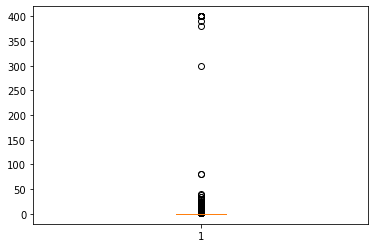

In [38]:
# yes we can expect on this case.

# #  iii. After dropping the useless records, make the suitable plot again to identify outliers.
plt.boxplot(pa['Price'])
plt

In [39]:
# # iv. Limit data to records with price < $30
xyz = pa[pa['Price'] > 30].index
pa.drop(labels=xyz, inplace=True)

In [40]:
count = pa.loc[pa['Price'] > 30].index
count.value_counts().sum()

0

C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


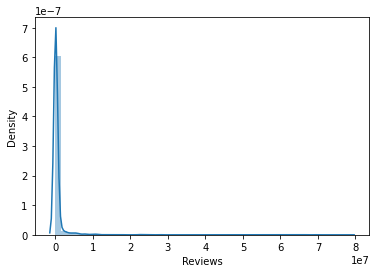

In [41]:
# # b. Reviews column
# #  i. Make suitable plot
# 

sns.distplot(pa['Reviews'])
plt.show()


In [42]:
# # ii. Limit data to apps with < 1 Million reviews
abc = pa[pa['Reviews'] > 1000000 ].index
pa.drop(labels = abc, inplace=True)

In [43]:
count=abc.value_counts().sum()
print(count)

704


In [44]:
# # c. Installs
# #  i. What is the 95th percentile of the installs?
# 

percentile95 = pa.Installs.quantile(0.95) 
print(percentile95,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


In [45]:
# # ii.Drop records having a value more than the 95th percentile
droping=pa[pa['Installs']>percentile95].index
pa.drop(labels=droping,inplace=True)
count=droping.value_counts().sum()
print(count,'records are dropped')

199 records are dropped


C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


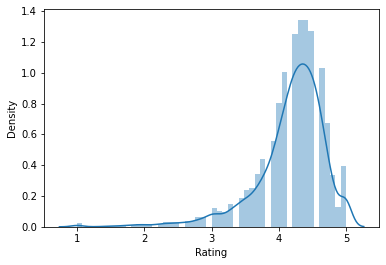

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [46]:

#  

# # ----------------------Data analysis to answer business questions---------------------

#  

# # (5)
# # What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
# #  a. How do you explain this?
# sns.distplot(pa['Rating'])

plt.show()
print('The skewness of this distribution is',pa['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(pa.Rating.median(),pa.Rating.mean()))

In [47]:
# # b. What is the implication of this on your analysis?
pa['Rating'].mode()

0    4.3
dtype: float64

In [48]:
pa['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [49]:
# Since mode >= median > mean, the distribution of Rating is Negatively Skewed.Thats why distribution of Rating is more Skewed towards lower values.

# # (6) 
# # What are the top Content Rating values?
# # a. Are there any values with very few records?
# 
pa['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [50]:
# adult only 18+ & unratedhave very few records.

# # b. If yes, drop those as they won’t help in the analysis

dropcontentrating = []
for d in pa['Content Rating']:
    dropcontentrating.append(d.replace('Adults only 18+','NaN').replace('Unrated','NaN'))
######Replacing unwanted values(adults only 18+ & unrated) with NaN than in next step drop them.
pa['Content Rating']=dropcontentrating

In [51]:
change = pa[pa["Content Rating"] == 'NaN'].index
pa.drop(labels=change, inplace=True)
print(change)

Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [53]:
pa['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

<module 'matplotlib.pyplot' from 'C:\\Users\\om\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

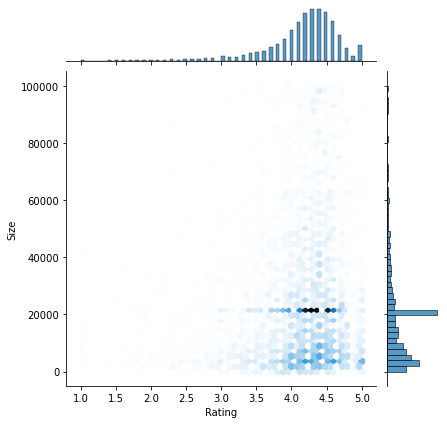

In [54]:
# # (7)
# # Effect of size on rating
# # a. Make a joinplot to understand the effect of size on rating

sns.jointplot(y ='Size', x ='Rating', data = pa, kind ='hex')
plt

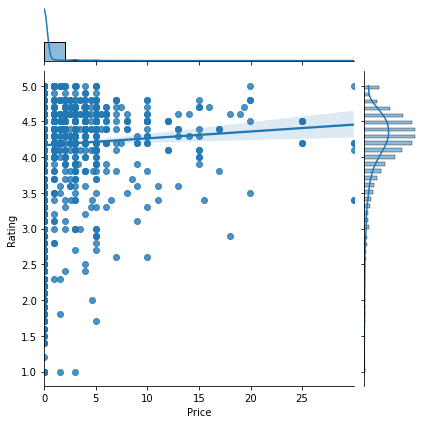

In [55]:
# # b. Do you see any patterns?
#      yes, we can observe patterns and correlation between rating & size.
# #  c.How do you explain the pattern?
#       In rating between 4.0 to 5.0 and size between 0 to 20000 having higher concentration means if rating increases, even though there is some points where change in size is constant but we can say between rating and size there is positive correlation exists. 

# # (8)
# # Effect of price on rating
# #  a. Make a jointplot (with regression line)
sns.jointplot(x='Price', y='Rating', data=pa, kind='reg')
plt.show()

In [56]:
# # b. What pattern do you see?
#     #  When increasing the Price, Rating remains almost constant greater than 4 in rating.
# #  c. How do you explain the pattern?
pa.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


<module 'matplotlib.pyplot' from 'C:\\Users\\om\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

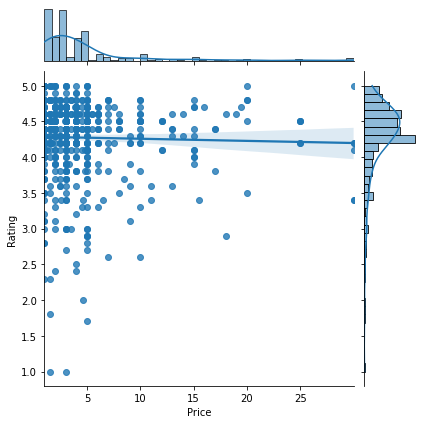

In [57]:
# Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

# # d. Replot the data, this time with only records with price > 0.
pa1=pa.loc[pa.Price>0]
sns.jointplot(x='Price', y='Rating', data=pa1, kind='reg')
plt

In [58]:
# # e. Does the pattern change?
#          yes, we can observe a slight change in regession line that is limiting the record with Price > 0, the overall pattern changed a slight their is very weakly negative correlation between price and rating.
# 
pa1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


<module 'matplotlib.pyplot' from 'C:\\Users\\om\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

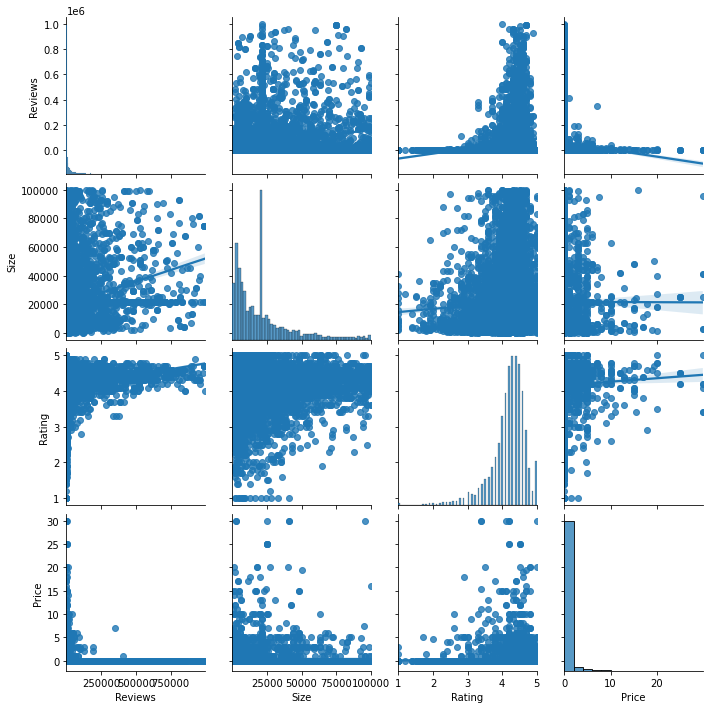

In [59]:
# # f. What is your overall inference on the effect of price on the rating
#     Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# # (9)
# # Look at all the numeric interactions together –
# # a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'
sns.pairplot(pa, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\om\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

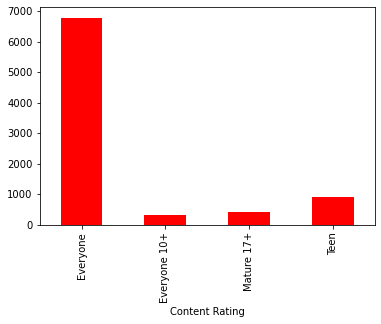

In [60]:
# # (10)
# # Rating vs. content rating
# # a. Make a bar plot displaying the rating for each content rating
pa.groupby(['Content Rating'])['Rating'].count().plot.bar(color="red")
plt

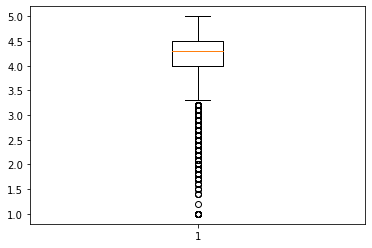

In [61]:
# # b. Which metric would you use? Mean? Median? Some other quantile?
#      We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

plt.boxplot(pa['Rating'])
plt.show()

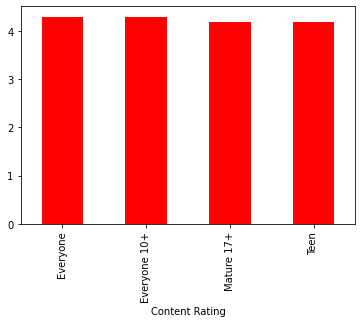

In [62]:
# # c. Choose the right metric and plot
pa.groupby(['Content Rating'])['Rating'].median().plot.bar(color="red")
plt.show()

In [63]:
# # 11. Content rating vs. size vs. rating – 3 variables at a time
# # a. Create 5 buckets (20% records in each) based on Size
bins=[0, 20000, 40000, 60000, 80000, 100000]
pa['Bucket Size'] = pd.cut(pa['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(pa, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [64]:
# # b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination.
abc=pd.pivot_table(pa, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
abc

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


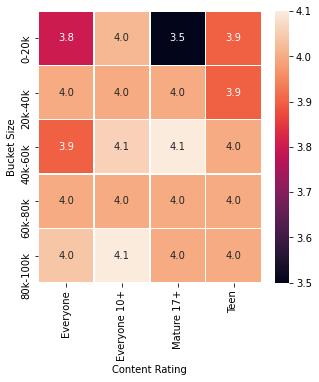

In [65]:
# # c. Make a heatmap of this
# # i. Annotated
# 
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(abc, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

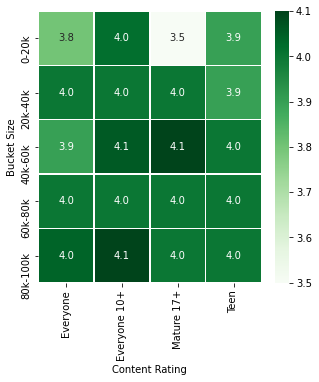

In [66]:
# # ii. Greens color map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(abc, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

In [ ]:
# # d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
#     No lighter apps are not preference in all catagories apps between 80-100k and 40-60k have higher ratings, here preference is given to high rated apps more than lighter apps according to heatmap. 
# 

#  

#  

#    # THANK YOU 
# # TARUN KUMAR SHARMA
# # BATCH - DS20SEP04
# 

# In[ ]: